# Using a simple LSTM recurrent network for sentiment analysis on IMDB data

In [29]:
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

Load the IMDB dataset which is inbuild in keras. Also, only top 1000 words are used to train our model. More on the data can be found here:
http://ai.stanford.edu/~amaas/data/sentiment/
Also for purpose of simplicity, I am only using 5000/25000 examples for training and testing on 1000

In [17]:
(X_train, y_train), (X_test, y_test)=imdb.load_data(nb_words=1000)
X_train = X_train[0:5000]
y_train = y_train[0:5000]
X_test = X_test[0:1000]
y_test = y_test[0:1000]
print('Training size', X_train.shape[0])
print('Testing size', X_test.shape[0])

Training size 5000
Testing size 1000


The feature vector is a list of sequences. It represents frequency encoding of a word present in the review text. The class is a binary class [0, 1] which represents positive/negative sentiment of that review.

In [20]:
print('Feature vector:', X_train[111])
print('Output class:', y_train[111])

Feature vector: [1, 54, 84, 942, 72, 138, 81, 13, 40, 102, 38, 76, 13, 633, 2, 28, 25, 110, 4, 498, 2, 720, 11, 852, 2, 2, 8, 516, 15, 136, 584, 184, 76, 2, 285, 13, 181, 8, 67, 11, 6, 22, 48, 13, 16, 6, 22, 167, 15, 62, 30, 4, 243, 7, 155, 474, 40, 8, 81, 2, 438, 9, 31, 96, 7, 2, 15, 720, 5, 12, 9, 371, 480, 8, 67, 89, 167, 852, 2, 436, 20, 495, 33, 4, 172, 312, 2, 2, 7, 15, 136, 12, 9, 6, 925, 40, 20, 2, 17, 609, 5, 19, 53, 2, 5, 2, 74, 6, 2, 108, 276, 295, 13, 104, 4, 20, 2, 35, 674, 213, 15, 80, 210, 30, 6, 2, 7, 2, 2, 100, 6, 20, 2, 2, 23, 2, 5, 131, 30, 2, 35, 2, 2, 4, 22, 47, 57, 749, 8, 2, 7, 116, 9, 87, 21, 12, 9, 33, 4, 2, 7, 4, 405, 5, 4, 229, 9, 346, 23, 2, 852, 2, 20, 166, 6, 66, 52, 420, 15, 405, 54, 2, 2, 70, 2, 6, 792, 2, 22, 252, 488, 2, 2, 2, 2, 2, 5, 2, 2, 202, 2, 354, 21, 14, 9, 6, 2, 20, 32, 4, 96, 8, 4, 2, 12, 9, 6, 2, 2, 7, 4, 2, 7, 4, 22, 2, 13, 528, 376, 25, 51, 2, 20, 4, 22, 2, 2, 8, 13, 92, 181, 8, 2, 101, 2, 21, 13, 104, 852, 2, 2, 4, 2, 2, 5, 29, 2, 8, 987,

In [21]:
X_train=sequence.pad_sequences(X_train, maxlen=500)
X_test=sequence.pad_sequences(X_test, maxlen=500)

In [22]:
# model and parameters
model = Sequential()
model.add(Embedding(1000, 32, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_3 (Embedding)          (None, 500, 32)       32000       embedding_input_3[0][0]          
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 100)           53200       embedding_3[0][0]                
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             101         lstm_3[0][0]                     
Total params: 85,301
Trainable params: 85,301
Non-trainable params: 0
____________________________________________________________________________________________________
None


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
results = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=5, batch_size=100)

Train on 5000 samples, validate on 1000 samples
Epoch 1/5
5000/5000 [==============================] - 224s - loss: 0.6703 - acc: 0.6136 - val_loss: 0.6648 - val_acc: 0.6120
Epoch 2/5
5000/5000 [==============================] - 358s - loss: 0.5590 - acc: 0.7284 - val_loss: 0.5569 - val_acc: 0.7390
Epoch 3/5
5000/5000 [==============================] - 354s - loss: 0.4100 - acc: 0.8290 - val_loss: 0.4168 - val_acc: 0.8210
Epoch 4/5
5000/5000 [==============================] - 381s - loss: 0.3404 - acc: 0.8592 - val_loss: 0.3673 - val_acc: 0.8430
Epoch 5/5
5000/5000 [==============================] - 294s - loss: 0.3188 - acc: 0.8694 - val_loss: 0.3740 - val_acc: 0.8420


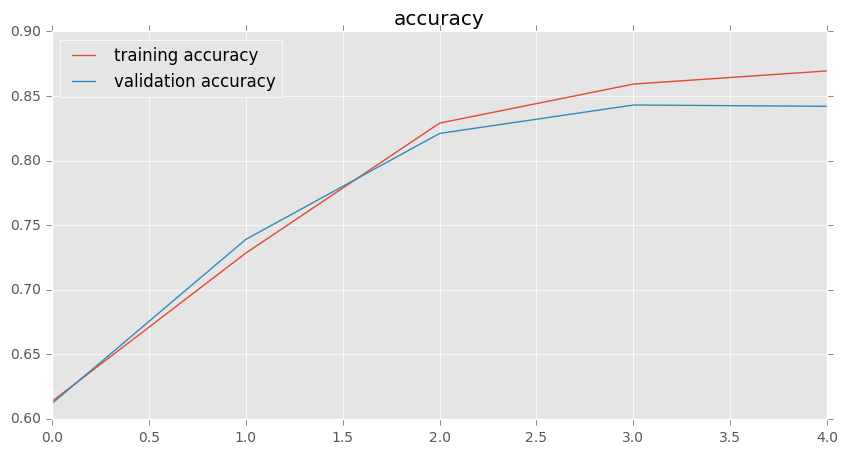

In [30]:
plt.figure(figsize=(10,5))
plt.title('accuracy')
plt.plot(results.history['acc'], label='training accuracy')
plt.plot(results.history['val_acc'], label='validation accuracy')
matplotlib.pylab.legend(loc='top left')

In [32]:
scores= model.evaluate(X_test, y_test, verbose=0)
print('Overall Accuracy', scores[1]*100,'%')

Overall Accuracy 84.2 %
